In [43]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
print(tf.__version__)

2.0.0


In [61]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.fit_transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [65]:
x_train_scaled = tf.expand_dims(x_train_scaled, axis=-1, name=None)
x_test_scaled = tf.expand_dims(x_test_scaled, axis=-1, name=None)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
   # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss=tf.keras.losses.sparse_categorical_crossentropy,
                    metrics=['accuracy'])

checkpoint_path = "training_fashion_mnist_3/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback_mc = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        monitor='val_loss',
                                                        mode='min',
                                                        verbose=1)
latest = tf.train.latest_checkpoint(checkpoint_dir)
if(latest != None):
    model.load_weights(latest).expect_partial()

history = model.fit(
         x_train,
         y_train,
         epochs=5,
         verbose=1,
         validation_data=(x_test, y_test),
         callbacks=[cp_callback_mc]
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
59744/60000 [============================>.] - ETA: 0s - loss: 2.4786 - accuracy: 0.7282
Epoch 00001: val_loss improved from inf to 0.67739, saving model to training_fashion_mnist_3/cp-0001.ckpt
60000/60000 [==============================] - 7s 121us/sample - loss: 2.4718 - accuracy: 0.7283 - val_loss: 0.6774 - val_accuracy: 0.7446
Epoch 2/5
59776/60000 [============================>.] - ETA: 0s - loss: 0.5847 - accuracy: 0.7885
Epoch 00002: val_loss improved from 0.67739 to 0.50372, saving model to training_fashion_mnist_3/cp-0002.ckpt
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5838 - accuracy: 0.7888 - val_loss: 0.5037 - val_accuracy: 0.8295
Epoch 3/5
59648/60000 [============================>.] - ETA: 0s - loss: 0.4845 - accuracy: 0.8302
Epoch 00003: val_loss improved from 0.50372 to 0.49917, saving model to training_fashion_mnist_3/cp-0003.ckpt
60000/60000 [==============================] - 7s

In [41]:
def conv2d(size, filters, stride, padding='same', activation=tf.nn.relu):
    return tf.keras.layers.Conv2D(
        filters = filters,
        kernel_size = [size, size],
        strides = (stride, stride),
        padding = padding,
        activation = activation
    )

model = tf.keras.Sequential([
    conv2d(3, 32, 2),
    conv2d(3, 64, 2),
    conv2d(3, 128, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss=tf.keras.losses.sparse_categorical_crossentropy,
                    metrics=['accuracy'])

checkpoint_path = "training_fashion_mnist_4/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback_mc = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        monitor='val_loss',
                                                        mode='min',
                                                        verbose=1)
latest = tf.train.latest_checkpoint(checkpoint_dir)
if(latest != None):
    model.load_weights(latest).expect_partial()

model.build((None, 28, 28, 1))
model.summary()
history = model.fit(
         x_train_scaled,
         y_train,
         epochs=5,
         verbose=1,
         validation_data=(x_test_scaled, y_test),
         callbacks=[cp_callback_mc]
         )

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           multiple                  320       
_________________________________________________________________
conv2d_19 (Conv2D)           multiple                  18496     
_________________________________________________________________
conv2d_20 (Conv2D)           multiple                  73856     
_________________________________________________________________
flatten_13 (Flatten)         multiple                  0         
_________________________________________________________________
dense_27 (Dense)             multiple                  20490     
Total params: 113,162
Trainable params: 113,162
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
59808/60000 [============================>.] - ETA: 0

In [23]:
history = model.fit(
         x_train_scaled,
         y_train,
         epochs=5,
         verbose=1,
         validation_data=(x_test_scaled, y_test),
         callbacks=[cp_callback_mc]
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
59488/60000 [============================>.] - ETA: 0s - loss: 0.5996 - accuracy: 0.7805
Epoch 00001: val_loss did not improve from 0.43254
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5987 - accuracy: 0.7808 - val_loss: 0.5382 - val_accuracy: 0.8038
Epoch 2/5
59904/60000 [============================>.] - ETA: 0s - loss: 0.4414 - accuracy: 0.8383
Epoch 00002: val_loss did not improve from 0.43254
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4414 - accuracy: 0.8383 - val_loss: 0.5446 - val_accuracy: 0.8018
Epoch 3/5
59584/60000 [============================>.] - ETA: 0s - loss: 0.3713 - accuracy: 0.8632
Epoch 00003: val_loss did not improve from 0.43254
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3715 - accuracy: 0.8631 - val_loss: 0.5337 - val_accuracy: 0.8148
Epoch 4/5
59680/60000 [============================>.] - ETA: 0s - loss: 0.3051 - a

In [59]:
def conv2d(size, filters, stride, padding='same', activation=tf.nn.relu):
    return tf.keras.layers.Conv2D(
        filters = filters,
        kernel_size = [size, size],
        strides = (stride, stride),
        padding = padding,
        activation = activation
    )

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    conv2d(3, 32, 2),
    tf.keras.layers.BatchNormalization(),
    conv2d(3, 64, 2),
    tf.keras.layers.BatchNormalization(),
    conv2d(3, 128, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss=tf.keras.losses.sparse_categorical_crossentropy,
                    metrics=['accuracy'])

checkpoint_path = "training_fashion_mnist_5/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback_mc = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        monitor='val_loss',
                                                        mode='min',
                                                        verbose=1)
latest = tf.train.latest_checkpoint(checkpoint_dir)
if(latest != None):
    model.load_weights(latest).expect_partial()

model.build((None, 28, 28, 1))
model.summary()
history = model.fit(
         x_train,
         y_train,
         epochs=5,
         verbose=1,
         validation_data=(x_test, y_test),
         callbacks=[cp_callback_mc]
         )

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_24 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
batch_normalization_25 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
batch_normalization_26 (Batc (None, 7, 7, 64)          256       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_27 (Batc (None, 4, 4, 128)       

In [69]:
def conv2d(size, filters, stride, padding='same', activation=tf.nn.relu):
    return tf.keras.layers.Conv2D(
        filters = filters,
        kernel_size = [size, size],
        strides = (stride, stride),
        padding = padding,
        activation = activation,
        kernel_initializer='lecun_normal',
        bias_initializer='lecun_normal',
    )

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    conv2d(3, 32, 2, activation=tf.nn.selu),
    conv2d(3, 64, 2, activation=tf.nn.selu),
    conv2d(3, 128, 2, activation=tf.nn.selu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss=tf.keras.losses.sparse_categorical_crossentropy,
                    metrics=['accuracy'])

checkpoint_path = "training_fashion_mnist_8/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback_mc = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        monitor='val_loss',
                                                        mode='min',
                                                        verbose=1)
latest = tf.train.latest_checkpoint(checkpoint_dir)
if(latest != None):
    model.load_weights(latest).expect_partial()

model.build((None, 28, 28, 1))
model.summary()
history = model.fit(
         x_train_scaled,
         y_train,
         epochs=5,
         verbose=1,
         validation_data=(x_test_scaled, y_test),
         callbacks=[cp_callback_mc]
         )

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_26 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                20490     
Total params: 113,162
Trainable params: 113,162
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
59872/60000 [============================>.] - ETA: 0

In [79]:
y = model.predict(x_test_scaled[0:10])
for i in range(10):
    print(tf.argmax(y[i]))
    print(y_test[i])

tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=uint8)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=uint8)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=uint8)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=uint8)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=uint8)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=uint8)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=uint8)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=uint8)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=uint8)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=uint8)


全连接模型 无归一化

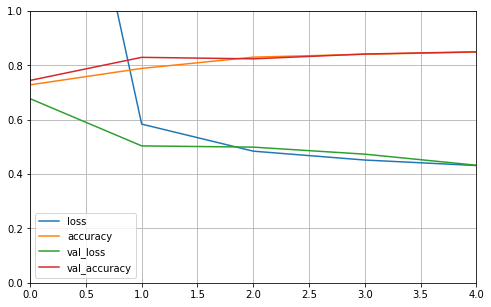

In [20]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)   #显示网格
    plt.gca().set_ylim(0, 1)    #设置y坐标轴范围
    plt.show()
    
plot_learning_curves(history)

全连接模型 有归一化

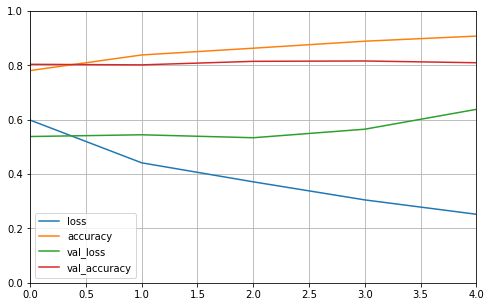

In [24]:
plot_learning_curves(history)

conv模型 bn归一化

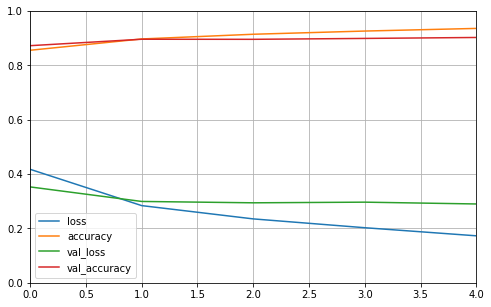

In [60]:
plot_learning_curves(history)

In [ ]:
conv模型 selu激活

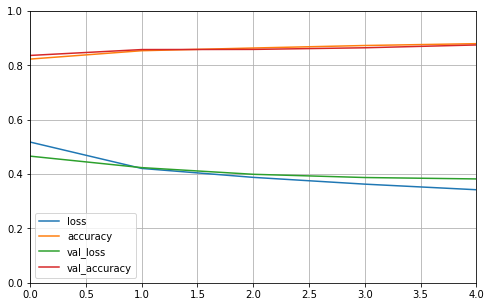

In [70]:
plot_learning_curves(history)